# Multiple Linear Regression

## Importing the libraries

In [1]:
import numpy as np                        # Used for numerical computations
import pandas as pd                       # Used for handling data in DataFrame format
from sklearn.model_selection import train_test_split  # Used for splitting the data into training and test sets
from sklearn.preprocessing import OneHotEncoder       # Used for encoding categorical variables
from sklearn.linear_model import LinearRegression     # Used for building the linear regression model
from sklearn.metrics import mean_squared_error        # Used for evaluating the model performance
import matplotlib.pyplot as plt


## Importing the dataset

In [2]:
dataset = pd.read_csv("/content/50_Startups.csv")

## Feature Engineering

In [3]:
# Separate features (X) and the target variable (y)
X = dataset.drop('Profit', axis=1)  # 'X' contains all features except the target 'Profit'
y = dataset['Profit']               # 'y' contains the target variable 'Profit'

In [4]:
# Perform One-Hot Encoding on the 'State' column to convert it into numerical format
# drop_first=True is used to avoid dummy variable trap (one less column after encoding)
X = pd.get_dummies(X, columns=['State'], drop_first=True)

## Splitting the dataset into the Training set and Test set

In [5]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training the Multiple Linear Regression model on the Training set

In [6]:
# Create a LinearRegression object and fit the model using the training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)  # Train the model with X_train and y_train

LinearRegression()

## Predicting the Test set results

In [7]:
# Use the trained model to predict the test set values (X_test)
y_pred = regressor.predict(X_test)
# Evaluate the model's performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

## Visualization

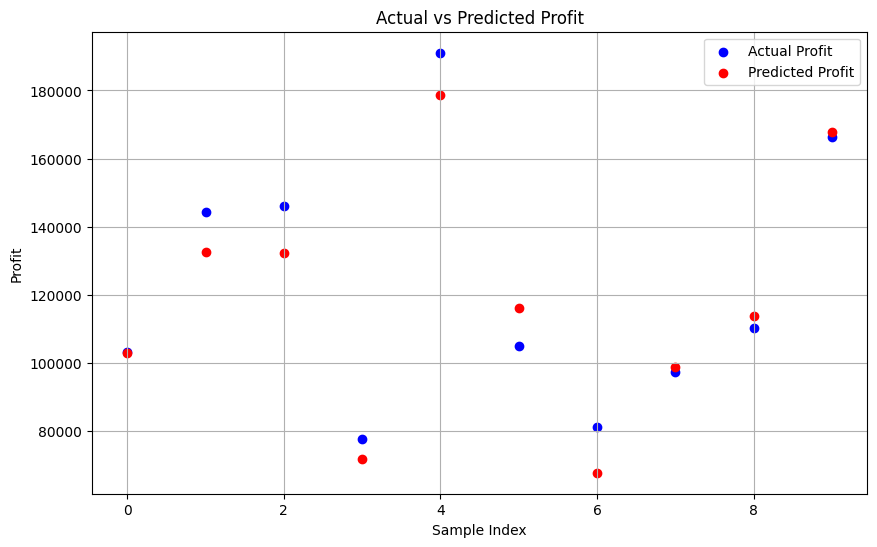

Mean Squared Error:  83502864.03257766


In [8]:
# Step 7: Visualizing the actual vs predicted results using matplotlib
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Profit')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Profit')
plt.title('Actual vs Predicted Profit')
plt.xlabel('Sample Index')
plt.ylabel('Profit')
plt.legend()
plt.grid(True)
plt.show()
# Print Mean Squared Error
print("Mean Squared Error: ", mse)